# **Data Visualization (using python)**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Load all the Dataset for Visualization

In [3]:
# Load the datasets
bedroom_counts = pd.read_csv('Data/Bedroom Counts vs. House Value.csv')
income_vs_value = pd.read_csv('Data/Correlation Between Income and House Value.csv')
housing_age_vs_value = pd.read_csv('Data/Effect of Housing Age on House Value.csv')
household_density = pd.read_csv('Data/Household Density Impact on Prices.csv')
income_segmentation = pd.read_csv('Data/Income Segmentation and House Value.csv')
income_price_ratio = pd.read_csv('Data/Income-to-House Price Ratio.csv')
ocean_proximity = pd.read_csv('Data/Ocean Proximity Impact.csv')
outlier_detection = pd.read_csv('Data/Outlier Detection (Z-score).csv')
price_distribution = pd.read_csv('Data/Price Distribution by Location (Longitude and Latitude).csv')
room_counts = pd.read_csv('Data/Room Counts vs. House Value.csv')


### Correlation Between Income and House Value

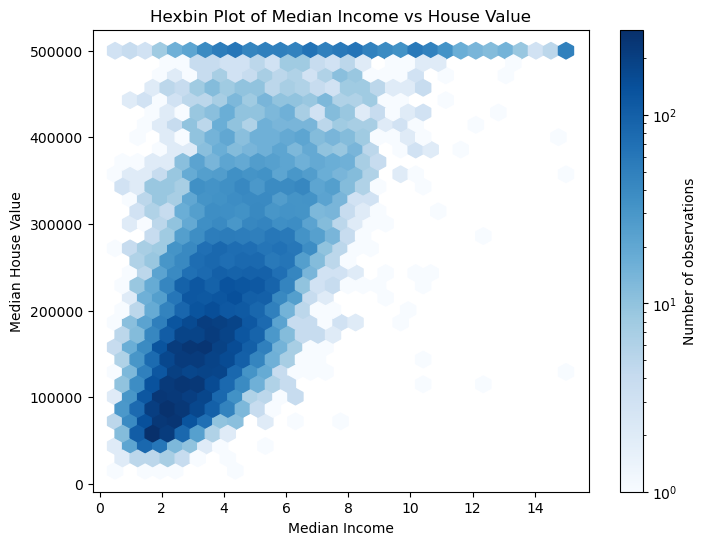

In [3]:
# Hexbin plot to show density of points
plt.figure(figsize=(8, 6))
plt.hexbin(income_vs_value['median_income'], income_vs_value['median_house_value'], gridsize=30, cmap='Blues', bins='log')
plt.colorbar(label='Number of observations')
plt.title('Hexbin Plot of Median Income vs House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.savefig('Plots/Hexbin Plot of Median Income vs House Value.png')
plt.show()

### Income Segmentation and House Prices

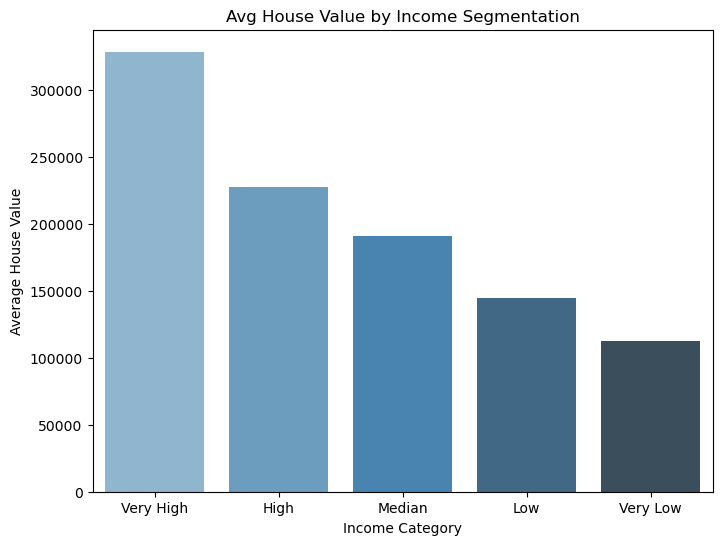

In [4]:
# Create a bar plot for income segmentation and house values
plt.figure(figsize=(8, 6))
sns.barplot(x='income_category', y='avg_house_value', data=income_segmentation, palette='Blues_d')
plt.title('Avg House Value by Income Segmentation')
plt.xlabel('Income Category')
plt.ylabel('Average House Value')
plt.savefig('Plots/Avg House Value by Income Segmentation.png')
plt.show()


### Average House Value by Housing Age Range

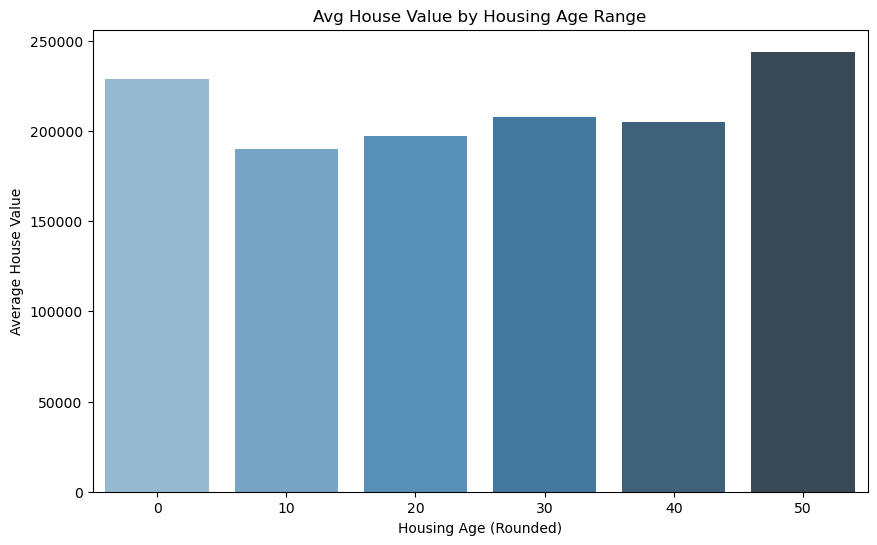

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='avg_house_value', data=housing_age_vs_value, palette='Blues_d')
plt.title('Avg House Value by Housing Age Range')
plt.xlabel('Housing Age (Rounded)')
plt.ylabel('Average House Value')
plt.savefig('Plots/Avg House Value by Housing Age Range.png')
plt.show()

### Room and Bedroom Counts Impact on House Prices

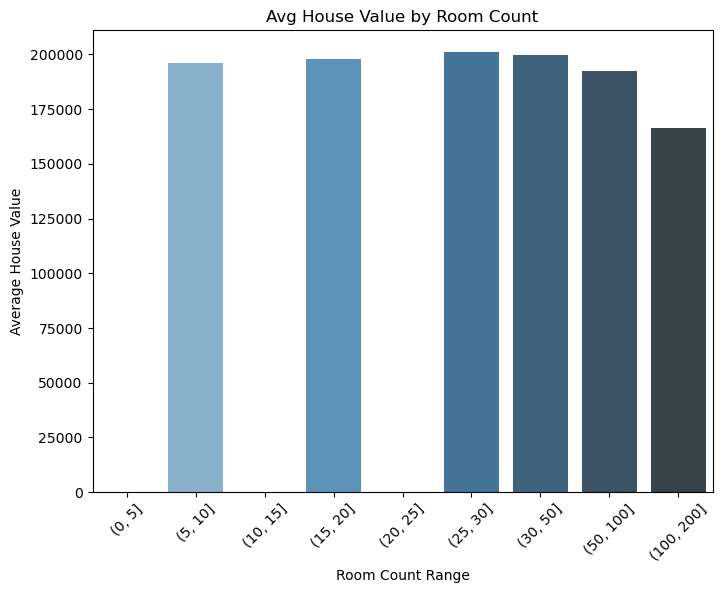

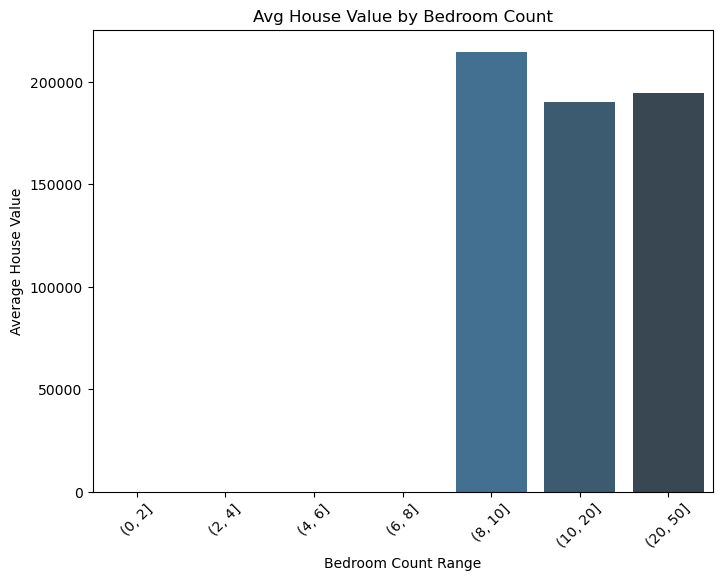

In [6]:
# Binning the room and bedroom counts
bins_rooms = [0, 5, 10, 15, 20, 25, 30, 50, 100, 200]  # Custom bin ranges for rooms
bins_bedrooms = [0, 2, 4, 6, 8, 10, 20, 50]  # Custom bin ranges for bedrooms

# Adding binned columns to the data
room_counts['room_bin'] = pd.cut(room_counts['room_group'], bins_rooms)
bedroom_counts['bedroom_bin'] = pd.cut(bedroom_counts['bedroom_group'], bins_bedrooms)

# Aggregating average house value by room bin and bedroom bin
room_bin_avg = room_counts.groupby('room_bin')['avg_house_value'].mean().reset_index()
bedroom_bin_avg = bedroom_counts.groupby('bedroom_bin')['avg_house_value'].mean().reset_index()

# Plotting binned room count vs house value
plt.figure(figsize=(8, 6))
sns.barplot(x='room_bin', y='avg_house_value', data=room_bin_avg, palette='Blues_d')
plt.title('Avg House Value by Room Count')
plt.xlabel('Room Count Range')
plt.ylabel('Average House Value')
plt.xticks(rotation=45)
plt.savefig('Plots/Avg House Value by Room Count.png')
plt.show()

# Plotting binned bedroom count vs house value
plt.figure(figsize=(8, 6))
sns.barplot(x='bedroom_bin', y='avg_house_value', data=bedroom_bin_avg, palette='Blues_d')
plt.title('Avg House Value by Bedroom Count')
plt.xlabel('Bedroom Count Range')
plt.ylabel('Average House Value')
plt.xticks(rotation=45)
plt.savefig('Plots/Avg House Value by Bedroom Count.png')
plt.show()


### Average House Value by Ocean Proximity

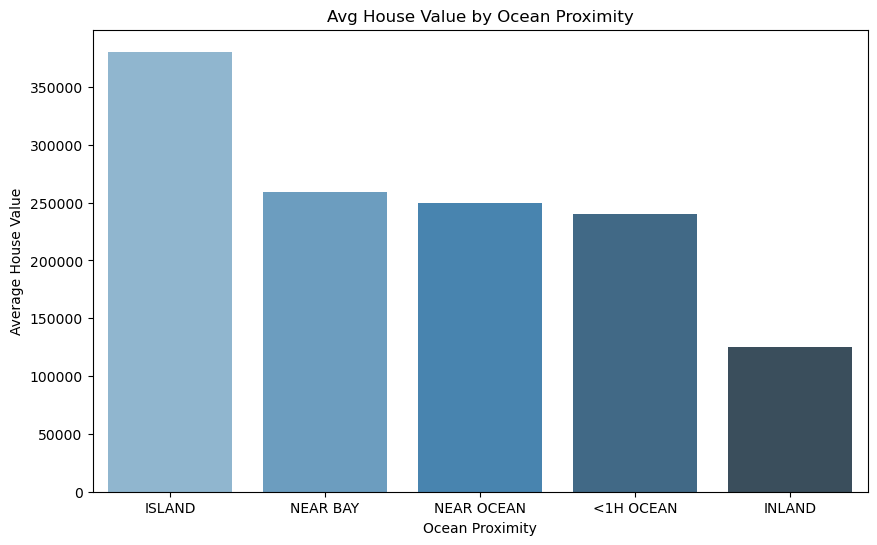

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x='ocean_proximity', y='avg_house_value', data=ocean_proximity, palette='Blues_d')
plt.title('Avg House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Average House Value')
plt.savefig('Plots/Avg House Value by Ocean Proximity.png')
plt.show()

### Ocean Proximity and House Prices

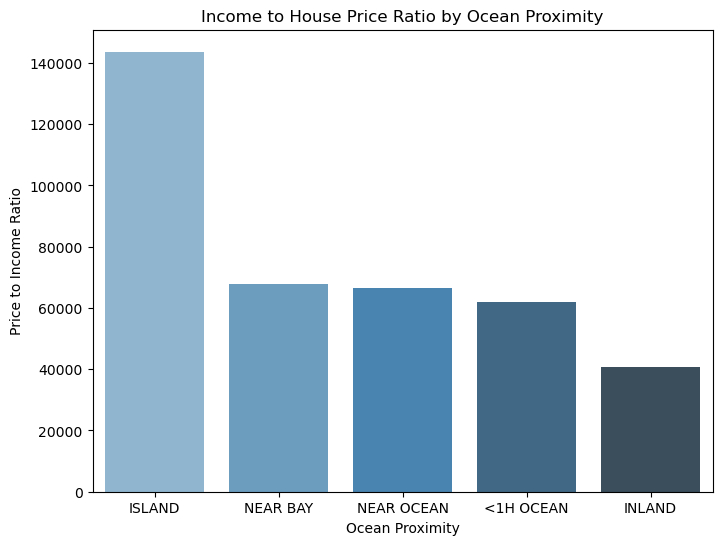

In [7]:
plt.figure(figsize=(8,6))
sns.barplot(x='ocean_proximity', y='price_income_ratio', data=income_price_ratio, palette='Blues_d')
plt.title('Income to House Price Ratio by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Price to Income Ratio')
plt.savefig('Plots/Income to House Price Ratio by Ocean Proximity.png')
plt.show()

### Z-Score Distribution of House Prices

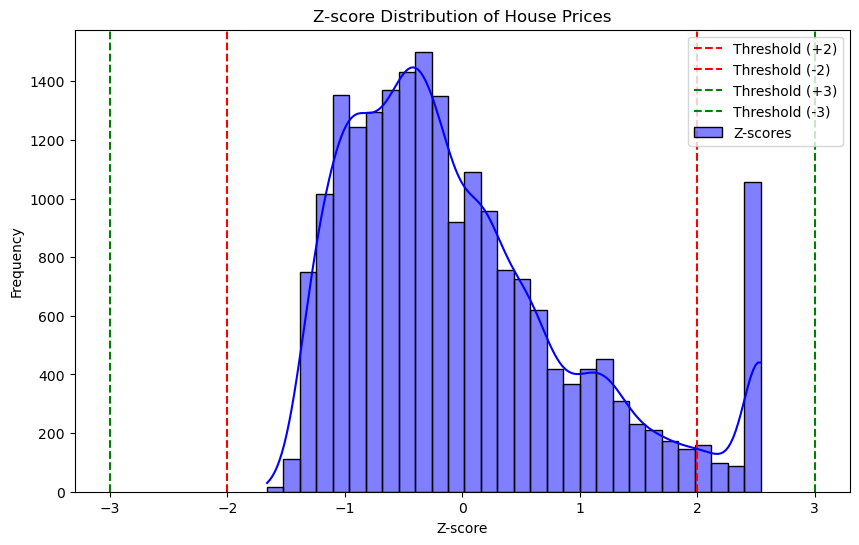

In [8]:
# Plotting the z-score distribution with outliers highlighted
plt.figure(figsize=(10, 6))
sns.histplot(outlier_detection['z_score'], bins=30, kde=True, color='blue', label='Z-scores')
plt.axvline(2, color='red', linestyle='--', label='Threshold (+2)')
plt.axvline(-2, color='red', linestyle='--', label='Threshold (-2)')
plt.axvline(3, color='green', linestyle='--', label='Threshold (+3)')
plt.axvline(-3, color='green', linestyle='--', label='Threshold (-3)')
plt.title('Z-score Distribution of House Prices')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Plots/Z-score Distribution of House Prices.png')
plt.show()

### Price Distribution by Location (Longitude and Latitude)

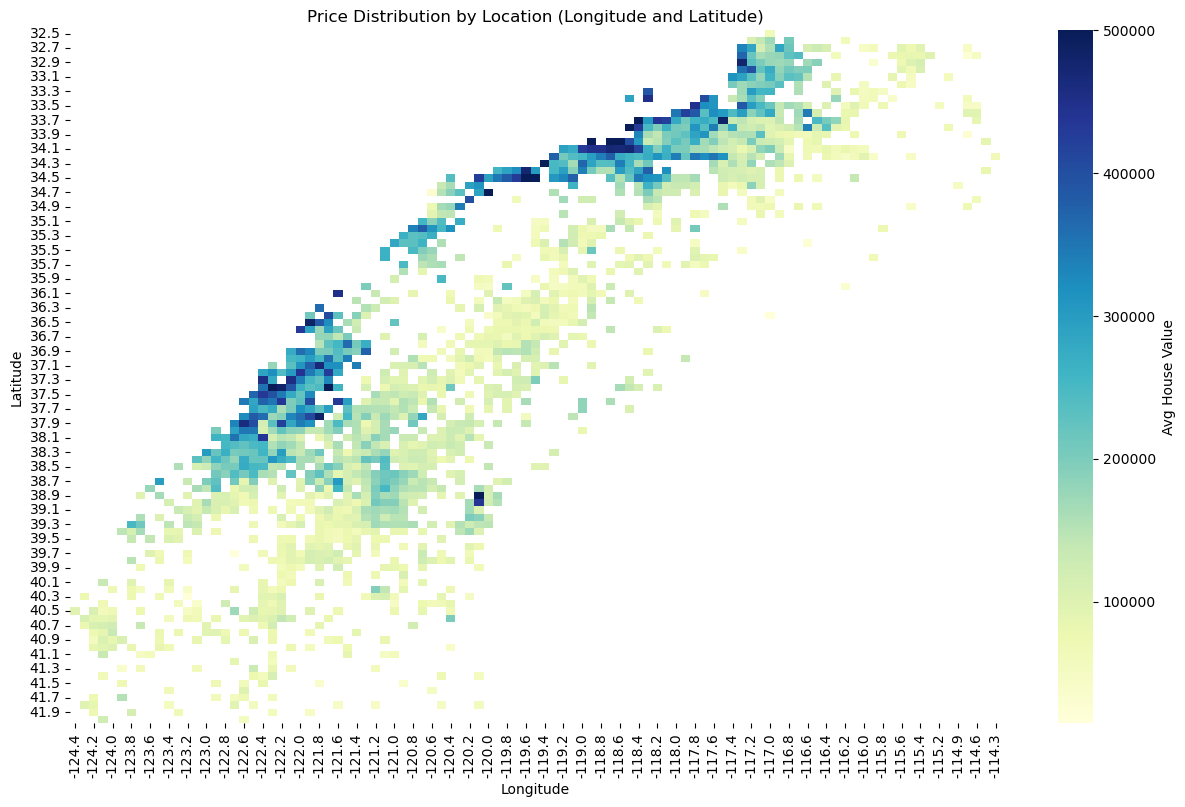

In [9]:
price_distribution_pivot = price_distribution.pivot(index="rounded_latitude", columns="rounded_longitude", values="avg_house_value")

# Plotting the heatmap
plt.figure(figsize=(15,9))
sns.heatmap(price_distribution_pivot, cmap="YlGnBu", cbar_kws={'label': 'Avg House Value'})
plt.title('Price Distribution by Location (Longitude and Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Plots/Price Distribution by Location.png')
plt.show()